**You can download the dataset for the use case from [Kaggle](https://www.kaggle.com/c/fake-news/data).**

# **Introduction**

* The epidemic spread of fake news is a side effect of the expansion of social networks to circulate news, in contrast to traditional mass media such as newspapers, magazines, radio, and television. Human inefficiency to distinguish between true and false facts exposes fake news as a threat to logical truth, democracy, journalism, and credibility in government institutions. 

* The veracity of information is an essential part of its integrity. The combat against fake news makes indissoluble the integrity and veracity checking of social networks' information and data consumption in the application layer. The disclosure of fake content implies a waste of processing and network resources. Further, it consists of a serious threat to the information integrity and credibility of the provided service. Hence, the sharing of untrue information concerns the Quality of Trust (QoT) applied to the news dissemination, referring to how much a user trusts the content of a particular source.

# **Business Problem**

* ***To develop a machine learning program to identify when an article might be fake news.***

# **Data Understanding**


* What is fake news? - The fake news term originally refers to false and often sensationalist information disseminated under the guise of relevant news. However, this term's use has evolved and is now considered synonymous with the spread of false information on social media. It is noteworthy that, according to Google Trends, the "fake news" term reached significant popularity in 2017.

* ***Fake news is defined as news that is intentionally and demonstrably false, or as any information presented as news that is factually incorrect and designed to mislead the news consumer into believing it to be true.***

# **Let's Begin**

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# importing data

df = pd.read_csv(r"train.csv",error_bad_lines=False)

# Do note that error_bad_lines=False will cause the offending lines to be skipped.

#### *What is the dimension of the data?*

In [2]:
df.shape

(20800, 5)

#### *How data looks like?*

In [3]:
# first 10 lines of the data
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


#### *What are the columns in the dataset?*

In [4]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


# **Basic Exploratory Data Analysis**

## **Missing Values**

#### *How many missing values are present in the dataset?*

In [6]:
pd.DataFrame(df.isnull().sum(),columns=['Count of missing values'])

,Count of missing values
id,0
title,558
author,1957
text,39
label,0


In [7]:
# Percentage of missing values  

pd.DataFrame(round(df.isnull().sum()*100/df.shape[0],2),columns=['Percentage of missing values'])

,Percentage of missing values
id,0.00
title,2.68
author,9.41
text,0.19
label,0.00


#### *How to deal with the missing data?*

In [8]:
# Percentage of missing values is less hence dropping those missing rows

df.dropna(inplace=True)
df.shape
# df = df.dropna()

(18285, 5)

In [9]:
df.reset_index(inplace=False,drop=True)  #resetting the index after dropping missing rows
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


## Word Clouds

In [10]:
from wordcloud import WordCloud, STOPWORDS
from os import path
import matplotlib.pyplot as plt

df_unreliable = df[df['label'] == 1]
df_reliable = df[df['label'] == 0]


Word Cloud for Authors of Fake news articles:


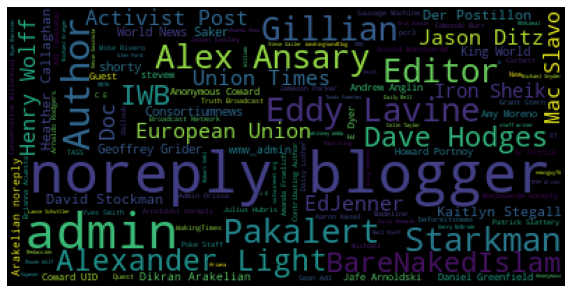

In [11]:
textp_w = df_unreliable['author']
stopwords = set(STOPWORDS)

print ("Word Cloud for Authors of Fake news articles:")
wordcloud = WordCloud().generate(' '.join(textp_w))
plt.figure(figsize=(10,10))
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Word Cloud for Authors of Reliable news articles:


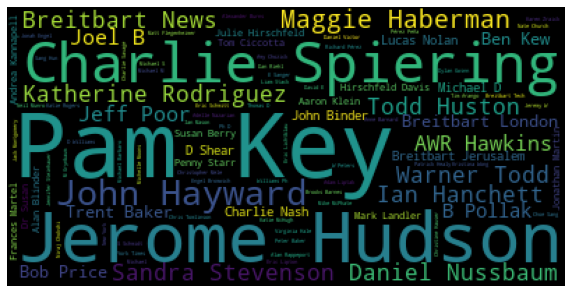

In [12]:
textp_w = df_reliable['author']
stopwords = set(STOPWORDS)

print ("Word Cloud for Authors of Reliable news articles:")
wordcloud = WordCloud().generate(' '.join(textp_w))
plt.figure(figsize=(10,10))
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## **Label Distribution (Data Imbalance)**

In [13]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

1 : Unreliable or fake
0 : Reliable

Distribution of labels is:
0    10361
1     7924
Name: label, dtype: int64


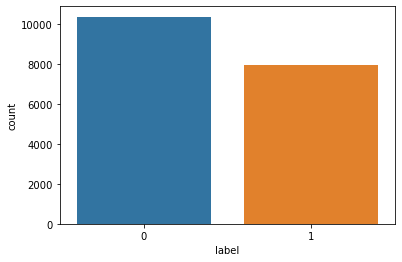

In [14]:
import seaborn as sns

sns.countplot(x = df['label']);
print("1 : Unreliable or fake")
print("0 : Reliable")

print("\nDistribution of labels is:")
print(df.label.value_counts());


In [15]:
print(round(df.label.value_counts(normalize=True),2)*100);

0    57.0
1    43.0
Name: label, dtype: float64


In [16]:
# following code if using Google colab
#from google.colab import files
df.to_csv('train_part_1.csv') 
#files.download('train_part_1.csv')

# End of Part-1!

# Importing data from part-1

In [17]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r"train_part_1.csv",error_bad_lines=False)
df = df.drop(df.columns[0], axis=1)
# Do note that error_bad_lines=False will cause the offending lines to be skipped.

df.shape

(18285, 5)

In [18]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [19]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [20]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.shape

(18285, 6)

# **Data Preprocessing** 

#### **Text Preprocessing**

- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

In [21]:
#!pip install Distance

In [22]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SOP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Illustration**

* The text pre-processing steps followed here are:
1. Perform lowercase operation
2. Punctuation Removal
3. Tokenization
4. Stemming
5. Stop-words removal
6. Join the words to create sentences
7. Get the Corpus!


In [23]:
doc1 = df['title'][0]
doc1

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [24]:
# Here 'House' and 'house' are the same words and should be treated same after converting into numbers
# hence converting them to lower case

doc1 = doc1.lower()
doc1

'house dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it'

Consider ‘What is data science?’ sentence for illustration:
* Token: You get a token by splitting a sentence by a space.
* Ex.: ‘What’, ‘is’, ‘data’, ‘science?’ are the 4 tokens.
* Stop-Words: stop words as per NLTK.
* Ex.: here ‘is’ is the stop word.
* Word: A token that is not a stop_word.
* Ex.: ‘What’, ‘data’, ‘science?’ are the words.

In [25]:
# removing special characters and punctuations

punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''

for ele in doc1: 
    if ele in punc: 
        doc1 = doc1.replace(ele, " ") 
doc1    

'house dem aide  we didn’t even see comey’s letter until jason chaffetz tweeted it'

In [26]:
# Splitting tokens on the basis of space
tokens1 = doc1.split(' ')

# first 10 tokens are
tokens1[:10]

['house',
 'dem',
 'aide',
 '',
 'we',
 'didn’t',
 'even',
 'see',
 'comey’s',
 'letter']

In [27]:
# we need to perform stemming and stopwords on the above tokens

# first 10 words after performing stemming and stopwords removal

words1 = [PorterStemmer().stem(token) for token in tokens1 if token not in set(stopwords.words('english'))]
words1[:10]

['hous',
 'dem',
 'aid',
 '',
 'didn’t',
 'even',
 'see',
 'comey’',
 'letter',
 'jason']

In [28]:
doc1 = ' '.join(words1)
doc1

'hous dem aid  didn’t even see comey’ letter jason chaffetz tweet'

In [29]:
#clubbing everything together

documents = pd.DataFrame(df['title'][:2])

def punc_remove(doc):
  punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
  for ele in doc: 
    if ele in punc: 
        doc = doc.replace(ele, " ") 
  return doc      


corpus=[]
sentences=[]
for i in range(0,len(documents)):
    review = re.sub('[^a-zA-Z]',' ', documents['title'][i])
    review = review.lower()
    review = punc_remove(review)
    tokens = review.split()
    words = [PorterStemmer().stem(token) for token in tokens if token not in set(stopwords.words('english'))]
    sentences =' '.join(words)
    corpus.append(sentences)

print(corpus)

['hous dem aid even see comey letter jason chaffetz tweet', 'flynn hillari clinton big woman campu breitbart']


### Performing Pre-processing of the data

In [30]:
# To get the results in 4 decimal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")
from tqdm import tqdm

def preprocess(documents):
    corpus=[]
    sentences=[]
    for i in tqdm(range(0,len(documents))):
      news = re.sub('[^a-zA-Z]',' ',documents['title'][i])
      news = news.lower()
      #news = news.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
      #                        .replace("won't", "will not").replace("cannot", "can not")\
      #                        .replace("can't", "can not")\
      #                        .replace("n't", " not").replace("what's", "what is")\
      #                        .replace("it's", "it is")\
      #                        .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
      #                        .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
      #                        .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
      #                        .replace("€", " euro ").replace("'ll", " will")
      #news = re.sub(r"([0-9]+)000000", r"\1m", news)
      #news = re.sub(r"([0-9]+)000", r"\1k", news)
      #news = punc_remove(news)
      tokens = news.split(' ')
      words = [PorterStemmer().stem(token) for token in tokens if token not in set(stopwords.words('english'))]
      sentences =' '.join(words)
      corpus.append(sentences)
    return corpus

print(preprocess(df.iloc[:1]))
corpus = preprocess(df)    


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 199.56it/s]


['hous dem aid  even see comey letter jason chaffetz tweet']


100%|███████████████████████████████████████████████████████████████████████████| 18285/18285 [01:06<00:00, 276.35it/s]


In [31]:
len(corpus)

18285

# Feature Extraction with Bag of Words (BoW)

In [32]:
# Applying Countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

## max_features=5000, it means I just need top 5000 features 
#example ABC News is basically 2 words,so in ngram,i have Given (1,3),so it will take the combination of 1 word,then 2 words 
#then 3 words

cv = CountVectorizer(max_features=5000,ngram_range=(1,3))

X = cv.fit_transform(corpus).toarray()
print(X.shape)

(18285, 5000)


In [33]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Which are the top 7 features?

In [34]:
print(cv.get_feature_names()[0:7])

['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl']


# Feature Extraction with TF-IDF

## Applying TFIDFvectorizer

In [35]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# corpus = preprocess(df)
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(corpus)
# print(X.shape)


# Function to plot confusion matrix

In [36]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divide each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    
    #divide each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

# Train-Test Split

In [37]:
df.shape

(18285, 6)

In [38]:
y_true = df['label']

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y_true,test_size=0.25, random_state=42)

In [40]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in validation data :",X_test.shape)

Number of data points in train data : (13713, 5000)
Number of data points in validation data : (4572, 5000)


In [43]:
from collections import Counter

print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",round(int(train_distr[0])*100/train_len,2),"Class 1: ", round(int(train_distr[1])*100/train_len,2))

print("-"*10, "Distribution of output variable in validation data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",round(int(test_distr[0])*100/test_len,2), "Class 1: ",round(int(test_distr[1])*100/test_len,2))

---------- Distribution of output variable in train data ----------
Class 0:  56.6 Class 1:  43.4
---------- Distribution of output variable in validation data ----------
Class 0:  56.87 Class 1:  43.13


# Random Baseline Model

In [1]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'sklearn.metrics.classification'

In [52]:
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])

predicted_y =np.argmax(predicted_y, axis=1)

print("Accuracy on Validation Data using Random Model",round(accuracy_score(y_test, predicted_y),2))

plot_confusion_matrix(y_test, predicted_y)


NameError: name 'np' is not defined

# Multinomial Naive Bayes Model

Accuracy on Train Data using NB Model 0.93
Accuracy on Validation Data using NB Model 0.89


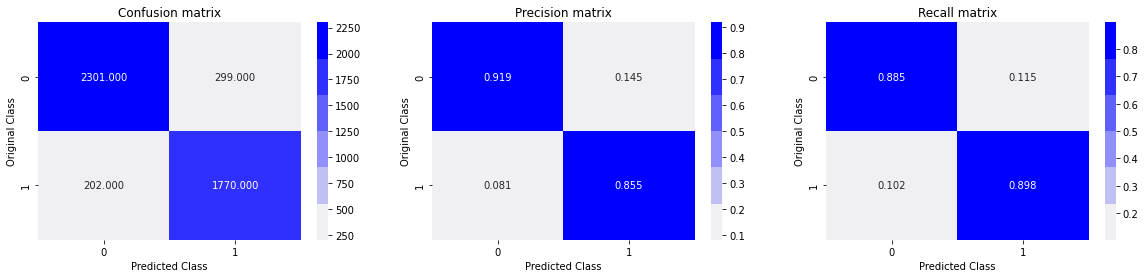

In [45]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

classifier.fit(X_train,y_train)

predicted_y_train = classifier.predict_proba(X_train)
predicted_y_train = np.argmax(predicted_y_train,axis=1)
print("Accuracy on Train Data using NB Model",round(metrics.accuracy_score(y_train, predicted_y_train),2))

predict_y = classifier.predict_proba(X_test)
predicted_y =np.argmax(predict_y,axis=1)

#print("Total number of validation data points :", len(predicted_y))
print("Accuracy on Validation Data using NB Model",round(metrics.accuracy_score(y_test,predicted_y),2))
plot_confusion_matrix(y_test, predicted_y)

# Passive Aggressive Classification Model

In [46]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [47]:
linear_clf=PassiveAggressiveClassifier()
# Fitting model 
linear_clf.fit(X_train, y_train)

PassiveAggressiveClassifier()

Accuracy on Train Data using PassiveAgressive Model 1.0
Total number of validation data points : 4572
Accuracy on Validation Data using PassiveAgressive Model 0.91


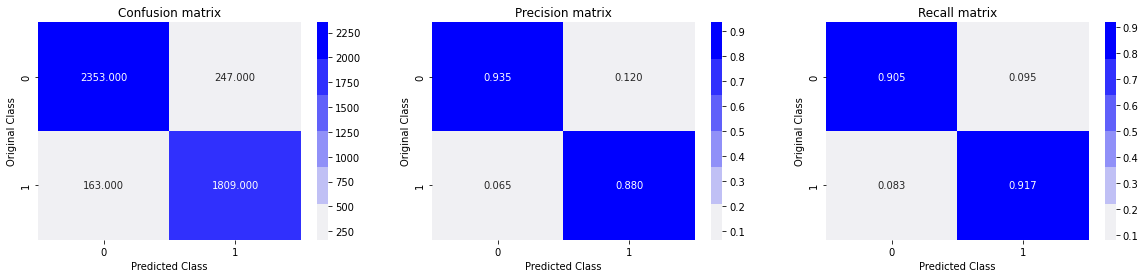

In [48]:
predictions=linear_clf.predict(X_test)

predicted_y_train = linear_clf.predict(X_train)
print("Accuracy on Train Data using PassiveAgressive Model",round(metrics.accuracy_score(y_train, predicted_y_train),2))

pred = linear_clf.predict(X_test)

print("Total number of validation data points :", len(predicted_y))
print("Accuracy on Validation Data using PassiveAgressive Model",round(metrics.accuracy_score(y_test,pred),2))
plot_confusion_matrix(y_test, pred)

In [49]:
metrics.accuracy_score(y_test,pred)

0.9103237095363079

# End!